In [1]:
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from nltk import ngrams


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

id                      query  \
0   1  bridal shower decorations   
1   2       led christmas lights   
2   4                  projector   
3   5                  wine rack   
4   7                 light bulb   

                                       product_title  \
0        Accent Pillow with Heart Design - Red/Black   
1  Set of 10 Battery Operated Multi LED Train Chr...   
2         ViewSonic Pro8200 DLP Multimedia Projector   
3  Concept Housewares WR-44526 Solid-Wood Ceiling...   
4  Wintergreen Lighting Christmas LED Light Bulb ...   

                                 product_description  median_relevance  \
0  Red satin accent pillow embroidered with a hea...                 1   
1  Set of 10 Battery Operated Train Christmas Lig...                 4   
2                                                NaN                 4   
3  Like a silent and sturdy tree, the Southern En...                 4   
4  WTGR1011\nFeatures\nNickel base, 60,000 averag...                 2   

   relevance_variance  
0               0.000  
1               0.000  
2               0.471  
3               0.000  
4               0.471

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  7714 non-null   object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


In [5]:
total_entries = data.shape[0]

non_null_entries = data['product_description'].notnull().sum()
missing_values = total_entries - non_null_entries
percentage_missing = (missing_values / total_entries) * 100
print(f"Percentage of missing values in product_description: {percentage_missing:.2f}%")

Percentage of missing values in product_description: 24.06%


In [6]:
data.describe()

id  median_relevance  relevance_variance
count  10158.000000      10158.000000        10158.000000
mean   16353.103071          3.309805            0.377863
std     9447.106683          0.980666            0.389707
min        1.000000          1.000000            0.000000
25%     8078.750000          3.000000            0.000000
50%    16349.500000          4.000000            0.471000
75%    24570.750000          4.000000            0.471000
max    32668.000000          4.000000            1.470000

In [7]:
data.fillna('', inplace=True)


In [8]:
print(data.isnull().sum())


id                     0
query                  0
product_title          0
product_description    0
median_relevance       0
relevance_variance     0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  10158 non-null  object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


### New Dataset to some Analysis

In [10]:
def word_count(text):
    return len(text.split())

In [11]:
def char_count(text):
    return len(text)

In [12]:
new_data = pd.DataFrame()

In [13]:
new_data['id'] = data['id'] 
new_data['query_word_count'] = data['query'].apply(word_count)
new_data['product_title_word_count'] = data['product_title'].apply(word_count)
new_data['product_description_word_count'] = data['product_description'].apply(word_count)

new_data['query_char_count'] = data['query'].apply(char_count)
new_data['product_title_char_count'] = data['product_title'].apply(char_count)
new_data['product_description_char_count'] = data['product_description'].apply(char_count)

new_data['median_relevance'] = data[['median_relevance']]

In [14]:
new_data = new_data.drop(columns=['id'])

In [15]:
new_data.head()

query_word_count  product_title_word_count  product_description_word_count  \
0                 3                         7                              14   
1                 3                        13                             146   
2                 1                         5                               0   
3                 2                        11                             121   
4                 2                         9                              44   

   query_char_count  product_title_char_count  product_description_char_count  \
0                25                        43                              74   
1                20                        72                             904   
2                 9                        42                               0   
3                 9                        92                             688   
4                10                        58                             303   

   median_relevance  
0                 1  
1                 4  
2                 4  
3                 4  
4                 2

In [16]:
new_data.describe()


query_word_count  product_title_word_count  \
count      10158.000000              10158.000000   
mean           2.424788                  8.596279   
std            0.858621                  3.499410   
min            1.000000                  1.000000   
25%            2.000000                  6.000000   
50%            2.000000                  8.000000   
75%            3.000000                 11.000000   
max            6.000000                 46.000000   

       product_description_word_count  query_char_count  \
count                    10158.000000      10158.000000   
mean                        61.153278         14.949301   
std                         72.316050          5.357284   
min                          0.000000          2.000000   
25%                          6.000000         11.000000   
50%                         43.000000         14.000000   
75%                         88.000000         18.000000   
max                       1627.000000         33.000000   

       product_title_char_count  product_description_char_count  \
count              10158.000000                    10158.000000   
mean                  53.978834                      392.982182   
std                   20.243337                      588.242798   
min                    5.000000                        0.000000   
25%                   40.000000                       44.000000   
50%                   52.000000                      264.500000   
75%                   67.000000                      544.750000   
max                  250.000000                    19436.000000   

       median_relevance  
count      10158.000000  
mean           3.309805  
std            0.980666  
min            1.000000  
25%            3.000000  
50%            4.000000  
75%            4.000000  
max            4.000000

In [17]:
sns.set(style="whitegrid")

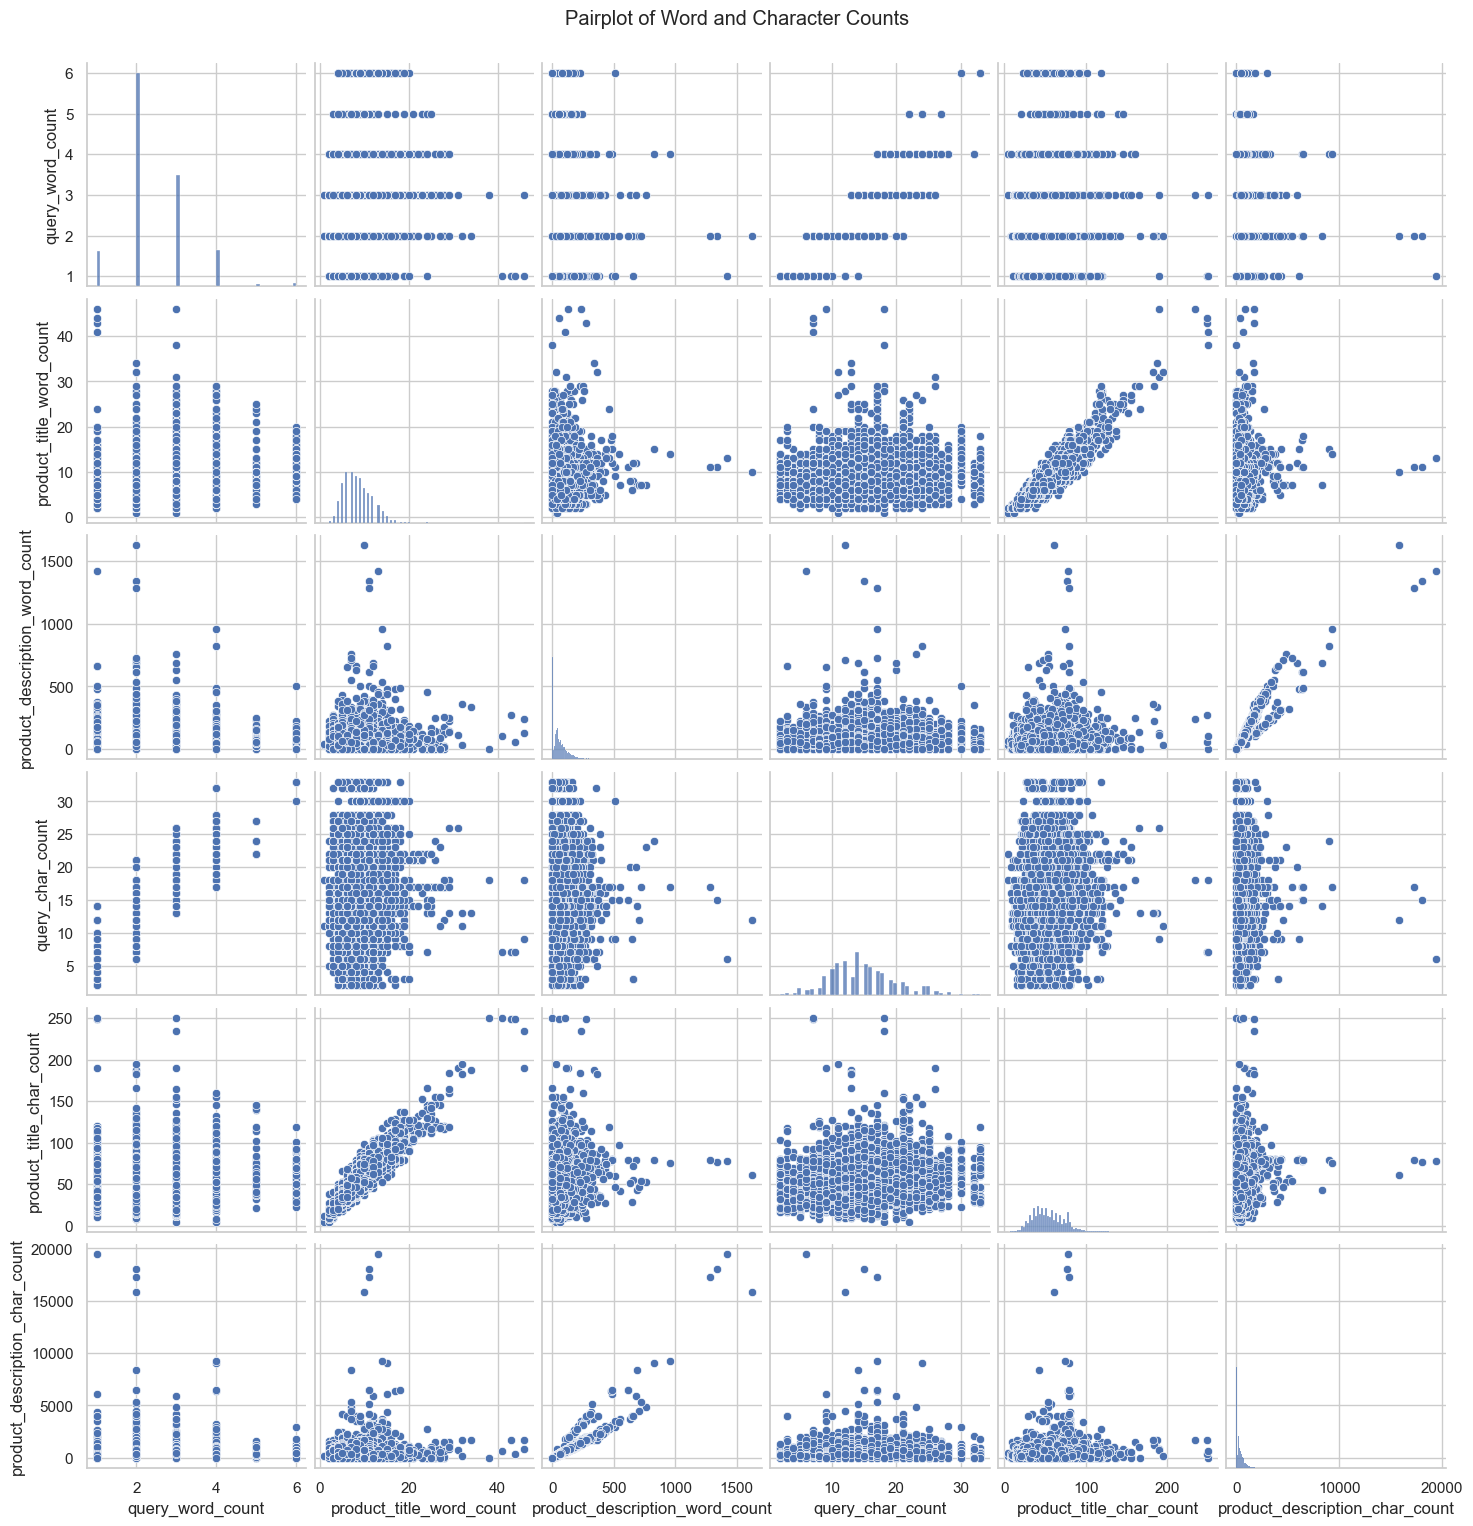

In [18]:
sns.pairplot(new_data, vars=['query_word_count', 'product_title_word_count', 
                              'product_description_word_count', 
                              'query_char_count', 
                              'product_title_char_count', 
                              'product_description_char_count'])
plt.suptitle('Pairplot of Word and Character Counts', y=1.02)
plt.show()

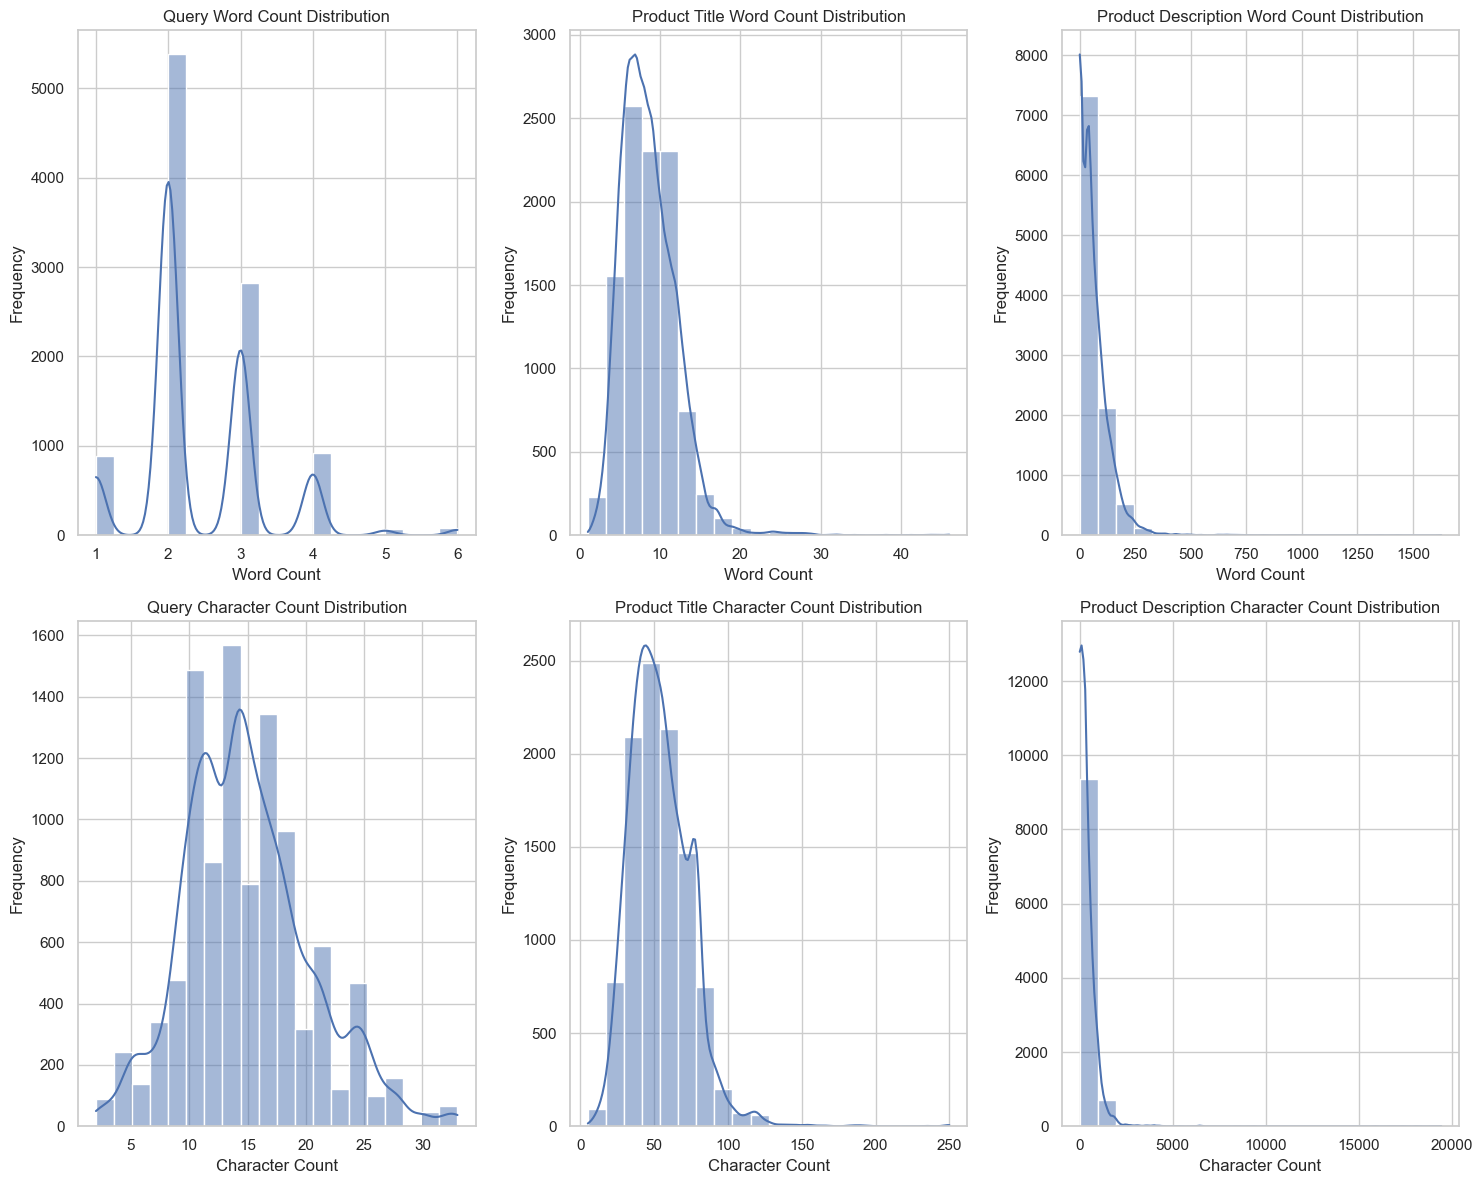

In [19]:
# Set up the visual aesthetics
sns.set(style="whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(15, 12))

# Plot histogram for query word count
plt.subplot(2, 3, 1)
sns.histplot(new_data['query_word_count'], bins=20, kde=True)
plt.title('Query Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for product title word count
plt.subplot(2, 3, 2)
sns.histplot(new_data['product_title_word_count'], bins=20, kde=True)
plt.title('Product Title Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for product description word count
plt.subplot(2, 3, 3)
sns.histplot(new_data['product_description_word_count'], bins=20, kde=True)
plt.title('Product Description Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for query character count
plt.subplot(2, 3, 4)
sns.histplot(new_data['query_char_count'], bins=20, kde=True)
plt.title('Query Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Plot histogram for product title character count
plt.subplot(2, 3, 5)
sns.histplot(new_data['product_title_char_count'], bins=20, kde=True)
plt.title('Product Title Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Plot histogram for product description character count
plt.subplot(2, 3, 6)
sns.histplot(new_data['product_description_char_count'], bins=20, kde=True)
plt.title('Product Description Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
import plotly.express as px

rating_counts = new_data['median_relevance'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create a horizontal bar chart
fig = px.bar(rating_counts, x='Count', y='Rating',
             title='Counts of Median Relevance Ratings',
             orientation='h',
             labels={'Count': 'Number of Occurrences', 'Rating': 'Median Relevance Rating'},
             color='Count')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Occurrences',
    yaxis_title='Median Relevance Rating',
    template='plotly_white'
)

# Show the figure
fig.show()

In [21]:
rating_counts = new_data['median_relevance'].value_counts().reset_index()
rating_counts.columns = ['Median Relevance', 'Count']  # Ensure column names are correct

# Create pie chart with labels and percentage
fig = px.pie(
    rating_counts,
    values='Count',
    names='Median Relevance',
    title='Distribution of Median Relevance Ratings',
    color='Median Relevance',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hover_data=['Count'],  # Include count in hover data
)

# Update the layout to show percentages and labels on the sections
fig.update_traces(textposition='inside', 
                  textinfo='percent+label')  # Show percentage and label inside the pie

# Show the chart
fig.show()

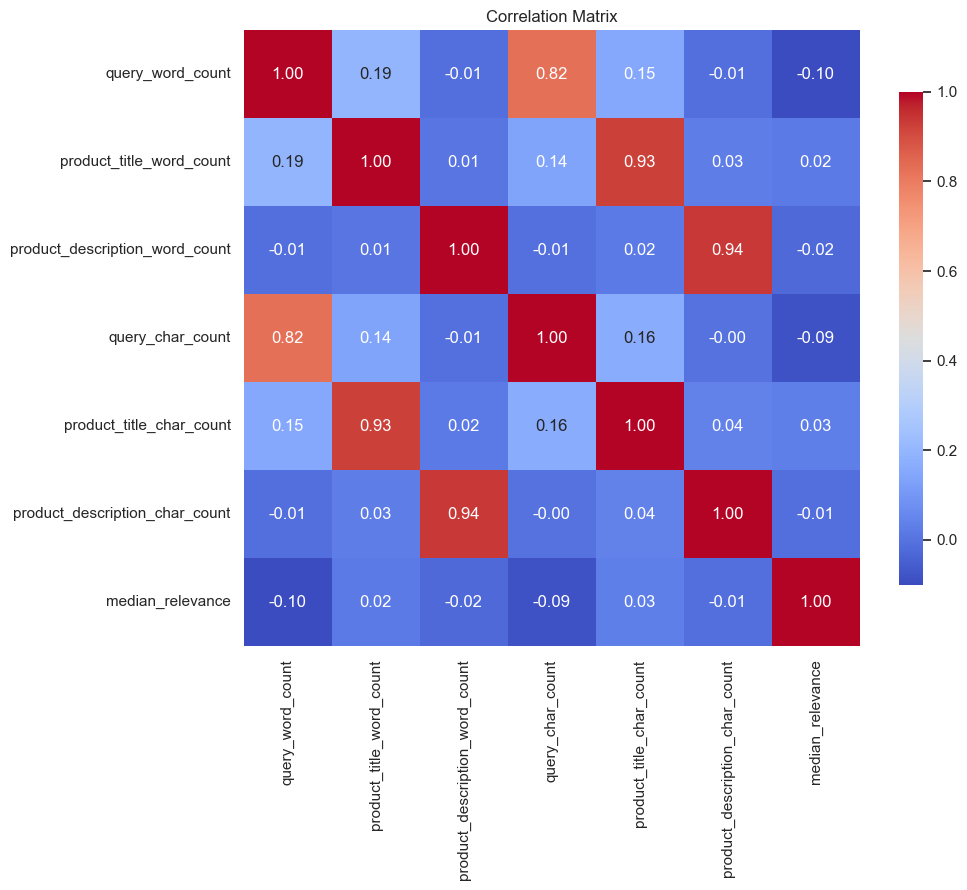

In [22]:
correlation_matrix = new_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [23]:
import statsmodels.api as sm

# Define the independent variables (features)
X = new_data[['query_word_count', 'product_title_word_count', 'product_description_word_count',
               'query_char_count', 'product_title_char_count', 'product_description_char_count']]
X = sm.add_constant(X)  # Add a constant term to the model

# Define the dependent variable (target)
y = new_data['median_relevance']

# Fit the regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the summary of the regression analysis
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       median_relevance   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     24.54
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.94e-29
Time:                        11:07:09   Log-Likelihood:                -14142.
No. Observations:               10158   AIC:                         2.830e+04
Df Residuals:                   10151   BIC:                         2.835e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.5243      0.038     92.584      0.000       3.450       3.599
query_word_count                  -0.0966      0.021     -4.625      0.000      -0.138      -0.056
product_title_word_count          -0.0114      0.008     -1.489      0.137      -0.026       0.004
product_description_word_count    -0.0016      0.000     -4.061      0.000      -0.002      -0.001
query_char_count                  -0.0046      0.003     -1.394      0.163      -0.011       0.002
product_title_char_count           0.0041      0.001      3.102      0.002       0.002       0.007
product_description_char_count     0.0002    4.7e-05      3.325      0.001    6.41e-05       0.000
==============================================================================
Omnibus:                     1415.197   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2108.479
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       2.970   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Data Processsing

In [24]:
import nltk
from nltk.tokenize import word_tokenize
import spacy
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob

# Download the 'punkt' resource
nltk.download('punkt')

data_EDA_Query = pd.DataFrame()

# Now you can tokenize the queries


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vasanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
data_EDA_Query['query_token'] = data['query'].apply(word_tokenize)

In [26]:
from spellchecker import SpellChecker

def correct_spelling(unigram_list):
    if unigram_list:  # Check if list is not empty
        corrected_tokens = [str(TextBlob(token).correct()) for token in unigram_list]
        return corrected_tokens  # Return list of corrected tokens
    return []

def find_misspelled_words(word_list):
    spell = SpellChecker()
    misspelled = spell.unknown(word_list)
    return list(misspelled)

In [27]:
from tqdm import tqdm
tqdm.pandas(desc="Correcting Spelling")
tqdm.pandas(desc="find misspelled words")

In [28]:
data_EDA_Query['corrected_tokens'] = data_EDA_Query['query_token'].progress_apply(correct_spelling)
data_EDA_Query['corrected_tokens'] = data_EDA_Query['query_token'].progress_apply(find_misspelled_words)

find misspelled words: 100%|█████████████████████████████████████████████████████| 10158/10158 [12:14<00:00, 13.83it/s]


In [29]:
def count_changes(row):
    original = row['query_token']
    corrected = row['corrected_tokens']
    changes_count = sum(1 for orig, corr in zip(original, corrected) if orig != corr)
    return changes_count

In [30]:
tqdm.pandas(desc="Counting Changes")

In [31]:
data_EDA_Query['Word_Spelling_change_count'] = data_EDA_Query.progress_apply(count_changes, axis=1)


Counting Changes: 100%|██████████████████████████████████████████████████████| 10158/10158 [00:00<00:00, 186352.36it/s]


In [32]:
data_EDA_Query['Word_Spelling_change_count'].value_counts()

Word_Spelling_change_count
0    9221
1     734
2     152
3      51
Name: count, dtype: int64

In [33]:
data_EDA_Query['query_token']

0         [bridal, shower, decorations]
1              [led, christmas, lights]
2                           [projector]
3                          [wine, rack]
4                         [light, bulb]
                      ...              
10153    [plantronics, corded, headset]
10154                       [spiderman]
10155       [playstation, vita, system]
10156                   [flower, bulbs]
10157     [polar, heart, rate, monitor]
Name: query_token, Length: 10158, dtype: object

In [166]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"haven't", 'was', 'were', 'then', 'too', 'am', 'further', 'hadn', 'y', "you're", 'have', 'off', 'yours', 'doing', 'i', 'and', 'they', 'down', 'd', 'after', 'shan', 'wasn', 'are', 'we', "you'd", 'under', 's', "don't", "didn't", "shouldn't", 'from', 'in', "that'll", 'hers', 'won', 'wouldn', 'out', 'above', 'here', 'weren', 'to', "mustn't", 'more', 'm', "couldn't", 'his', 'this', 'itself', 'has', "hadn't", "shan't", 'who', 'which', 'only', 'at', 'these', 'that', "wouldn't", 'very', "it's", 'through', "needn't", 'own', 'before', 'other', 'my', 'him', 'does', 'because', 'there', 've', 'its', 'about', 'again', 'few', 'her', 'mustn', 'the', 'is', 'no', 'by', 'can', 'now', 'yourself', 'haven', 'mightn', 'shouldn', 'than', 'those', 'doesn', 'on', 'when', 'yourselves', 'your', 'once', "hasn't", 'for', 'me', 'be', 'you', 'been', 'will', 'just', 'ours', 'during', "you'll", 'should', 'herself', 'a', 'as', 'our', 'needn', 'but', 'isn', "wasn't", 'while', "doesn't", 'she', 'up', 'so', 'an', 'theirs'

In [167]:
custom_stop_words = {'for', 'and', 'is', 'the', 'to', 'you','wii'}
stop_words.update(custom_stop_words)
print(stop_words)

{"haven't", 'was', 'were', 'then', 'too', 'am', 'further', 'hadn', 'y', "you're", 'have', 'off', 'yours', 'doing', 'i', 'and', 'they', 'down', 'd', 'after', 'shan', 'wasn', 'are', 'we', "you'd", 'under', 's', "don't", "didn't", "shouldn't", 'from', 'in', "that'll", 'hers', 'won', 'wouldn', 'out', 'above', 'here', 'weren', 'to', "mustn't", 'more', 'm', "couldn't", 'his', 'this', 'itself', 'has', "hadn't", "shan't", 'who', 'which', 'only', 'at', 'these', 'that', "wouldn't", 'very', "it's", 'through', "needn't", 'own', 'before', 'other', 'my', 'him', 'does', 'because', 'there', 've', 'its', 'about', 'again', 'few', 'her', 'mustn', 'the', 'is', 'wii', 'no', 'by', 'can', 'now', 'yourself', 'haven', 'mightn', 'shouldn', 'than', 'those', 'doesn', 'on', 'when', 'yourselves', 'your', 'once', "hasn't", 'for', 'me', 'be', 'you', 'been', 'will', 'just', 'ours', 'during', "you'll", 'should', 'herself', 'a', 'as', 'our', 'needn', 'but', 'isn', "wasn't", 'while', "doesn't", 'she', 'up', 'so', 'an', '

In [168]:

def process_words(word_list):

    # Process words
    processed_words = [word.lower() for word in word_list if word.lower() not in stop_words]
    
    return processed_words

In [169]:
data_EDA_Query['query_no_stopwords'] = data_EDA_Query['corrected_tokens'].apply(process_words)

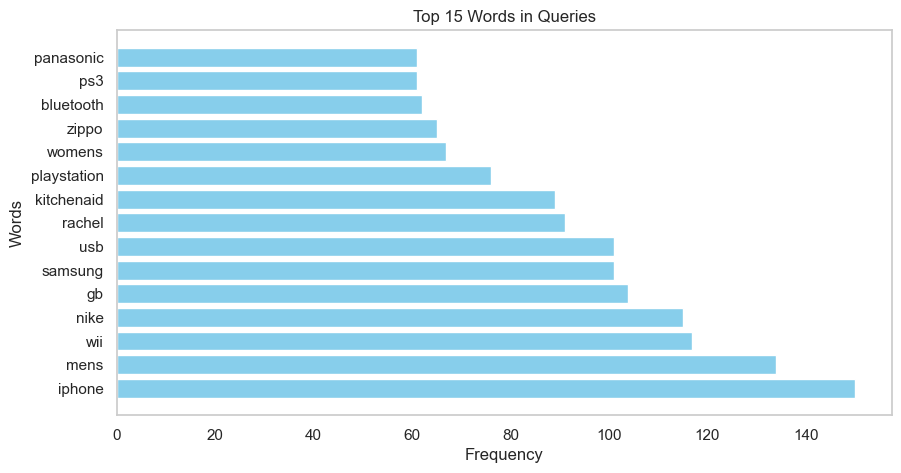

In [174]:
all_words = [word for sublist in data_EDA_Query['corrected_tokens'] for word in sublist]
word_counts = Counter(all_words)

# Plot top 15 most common words
top_words = word_counts.most_common(15)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')
plt.title('Top 15 Words in Queries')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Remove grid
plt.grid(False)

# Save the plot as a PNG file
plt.savefig('single_words_queries_horizontal.png', bbox_inches='tight')

# Show the plot
plt.show()

In [39]:
data_EDA_Query['median_relevance'] = data[['median_relevance']]

In [40]:
def get_sentiment(query):
    analysis = TextBlob(' '.join(query))
    return analysis.sentiment.polarity

In [41]:
data_EDA_Query['two_words'] = data_EDA_Query['corrected_tokens'].apply(lambda x: ' '.join(x) if len(x) == 2 else None)


In [42]:
def get_sentiment_two_words(query):
    if query:  # Check if query is not None or empty
        analysis = TextBlob(query)
        return analysis.sentiment.polarity
    return None  # Return None if the query is None

In [43]:
data_EDA_Query['Query_sentiment_2'] = data_EDA_Query['two_words'].apply(get_sentiment_two_words)


In [44]:
two_word_counts = Counter(data_EDA_Query['two_words'].dropna())

# Create a DataFrame from the counter
common_two_words = pd.DataFrame(two_word_counts.items(), columns=['Two_Words', 'Count'])

# Sort by count in descending order
common_two_words = common_two_words.sort_values(by='Count', ascending=False)



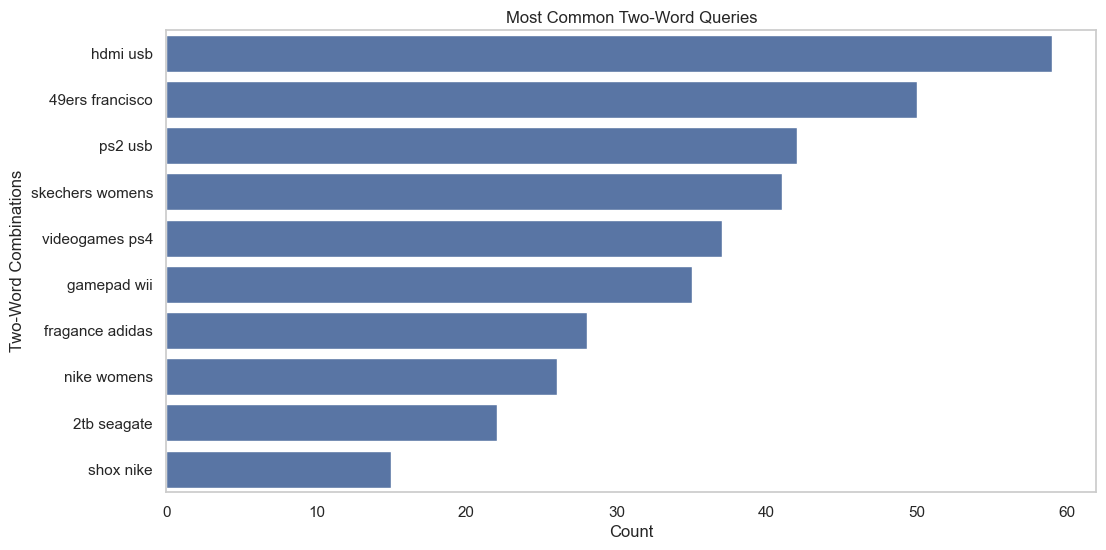

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Two_Words', data=common_two_words.head(10))
plt.title('Most Common Two-Word Queries')
plt.xlabel('Count')
plt.ylabel('Two-Word Combinations')
plt.grid(False)

plt.savefig('two_words_queries_horizontal.png', bbox_inches='tight')
plt.show()

In [46]:
def extract_trigrams(word_list):
    return list(ngrams(word_list, 3))

In [47]:
data_EDA_Query['trigrams'] = data_EDA_Query['corrected_tokens'].apply(extract_trigrams)


In [48]:
data_EDA_Query['trigrams']

0        []
1        []
2        []
3        []
4        []
         ..
10153    []
10154    []
10155    []
10156    []
10157    []
Name: trigrams, Length: 10158, dtype: object

In [49]:
all_trigrams = [trigram for sublist in data_EDA_Query['trigrams'] for trigram in sublist]

# Count occurrences of each trigram
trigram_counts = Counter(all_trigrams)

# Get the most common trigrams
most_common_trigrams = trigram_counts.most_common(10)

# Create a DataFrame for the most common trigrams
most_common_trigram_df = pd.DataFrame(most_common_trigrams, columns=['trigram', 'count'])

# Convert the 'trigram' column from tuples to a readable string
most_common_trigram_df['trigram'] = most_common_trigram_df['trigram'].apply(lambda x: ' '.join(x))

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_17180\722443441.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




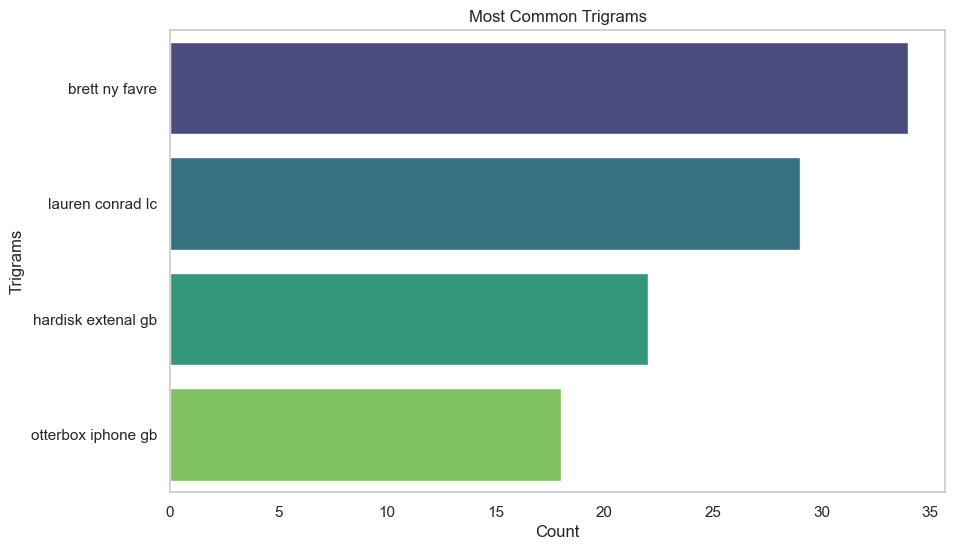

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_common_trigram_df, y='trigram', x='count', palette='viridis')
plt.title('Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.grid(axis='x')
plt.show()

In [51]:
# Convert tuples in 'trigrams' to lists
data_EDA_Query['trigrams'] = data_EDA_Query['trigrams'].apply(lambda x: [list(t) for t in x])


In [52]:
data_EDA_Query

query_token corrected_tokens  \
0       [bridal, shower, decorations]               []   
1            [led, christmas, lights]      [christmas]   
2                         [projector]               []   
3                        [wine, rack]               []   
4                       [light, bulb]               []   
...                               ...              ...   
10153  [plantronics, corded, headset]    [plantronics]   
10154                     [spiderman]      [spiderman]   
10155     [playstation, vita, system]    [playstation]   
10156                 [flower, bulbs]               []   
10157   [polar, heart, rate, monitor]               []   

       Word_Spelling_change_count query_no_stopwords  median_relevance  \
0                               0                 []                 1   
1                               1        [christmas]                 4   
2                               0                 []                 4   
3                               0                 []                 4   
4                               0                 []                 2   
...                           ...                ...               ...   
10153                           0      [plantronics]                 4   
10154                           0        [spiderman]                 2   
10155                           0      [playstation]                 2   
10156                           0                 []                 1   
10157                           0                 []                 4   

      two_words  Query_sentiment_2 trigrams  
0          None                NaN       []  
1          None                NaN       []  
2          None                NaN       []  
3          None                NaN       []  
4          None                NaN       []  
...         ...                ...      ...  
10153      None                NaN       []  
10154      None                NaN       []  
10155      None                NaN       []  
10156      None                NaN       []  
10157      None                NaN       []  

[10158 rows x 8 columns]

### Product title

In [53]:
data_EDA_product_title = pd.DataFrame()

In [54]:
data_EDA_product_title['product_title'] = data[['product_title']]

In [55]:
data_EDA_product_title.fillna('', inplace=True)

In [56]:
data_EDA_product_title['title_token'] = data_EDA_product_title['product_title'].apply(word_tokenize)

In [57]:
data_EDA_product_title['title_token'][0]

['Accent', 'Pillow', 'with', 'Heart', 'Design', '-', 'Red/Black']

In [58]:
import re
def process_tokens(token_list):
    # Lowercase and replace symbols (except numbers) with spaces
    processed_tokens = [re.sub(r'[^a-zA-Z0-9 ]', ' ', token.lower()) for token in token_list]
    return processed_tokens

In [59]:
tqdm.pandas(desc="Processing Tokens")
data_EDA_product_title['processed_title_tokens'] = data_EDA_product_title['title_token'].progress_apply(process_tokens)

Processing Tokens: 100%|█████████████████████████████████████████████████████| 10158/10158 [00:00<00:00, 154756.64it/s]


In [60]:
data_EDA_product_title['product_title'][30]

"Pinemeadow Golf Nitrix Pro Men's Complete 12-Piece Golf Club Set, Right-Handed"

In [61]:
data_EDA_product_title['processed_title_tokens'][30]

['pinemeadow',
 'golf',
 'nitrix',
 'pro',
 'men',
 ' s',
 'complete',
 '12 piece',
 'golf',
 'club',
 'set',
 ' ',
 'right handed']

In [62]:
def split_tokens(token_list):
    # Flatten any tokens with spaces and return as a single list of tokens
    flat_tokens = []
    for token in token_list:
        # Split any token that contains spaces
        flat_tokens.extend(token.split())
    return flat_tokens

In [63]:
data_EDA_product_title['processed_title_tokens'] = data_EDA_product_title['processed_title_tokens'].apply(split_tokens)

In [64]:
data_EDA_product_title['processed_title_tokens'][300]

['honey',
 'stinger',
 'kids',
 'organic',
 'stinger',
 'waffles',
 'multipack',
 'box',
 'of',
 '6']

In [155]:
data_EDA_product_title['title_tokens_no_stoowords'] = data_EDA_product_title['processed_title_tokens'].apply(process_words)

In [66]:
data_EDA_product_title['title_tokens_no_stoowords'][5040]

['linksys', 'wrt54gl', 'ieee', '802', '11b', 'g', 'wireless', 'router']

In [67]:
colors = [
    'red', 'green', 'blue', 'black', 'white', 'yellow', 'pink', 'purple',
    'orange', 'brown', 'gray', 'cyan', 'magenta', 'violet', 'indigo'
]

exclude_words = ['women', 'men']

# Function to filter tokens
def filter_tokens(token_list):
    meaningful_words = []
    removed_tokens = []

    for token in token_list:
        token = token.strip()  # Remove leading/trailing spaces
        
        # Check if token is a meaningful word or falls into categories to remove
        if (len(token) > 2 and re.match(r'^[A-Za-z]+$', token)) or \
           (len(token) > 2 and re.match(r'^[A-Za-z0-9]+$', token)):
            # Check if token is not a color and not in exclude words
            if token.lower() not in colors and token.lower() not in exclude_words:
                meaningful_words.append(token)
            else:
                removed_tokens.append(token)
        else:
            removed_tokens.append(token)

    return meaningful_words, removed_tokens

In [68]:
tqdm.pandas(desc="Processing Titles")
data_EDA_product_title[['title_tokens_filtered', 'removed_title_tokens']] = data_EDA_product_title['title_tokens_no_stoowords'].progress_apply(lambda x: pd.Series(filter_tokens(x)))

# Count the preferred colors from the removed tokens
color_counts = pd.Series(data_EDA_product_title['removed_title_tokens'].explode()).value_counts()

Processing Titles: 100%|██████████████████████████████████████████████████████| 10158/10158 [00:00<00:00, 14386.49it/s]


In [69]:
filtered_word_freq = data_EDA_product_title['title_tokens_filtered'].explode().value_counts().to_dict()
removed_word_freq = data_EDA_product_title['removed_title_tokens'].explode().value_counts().to_dict()


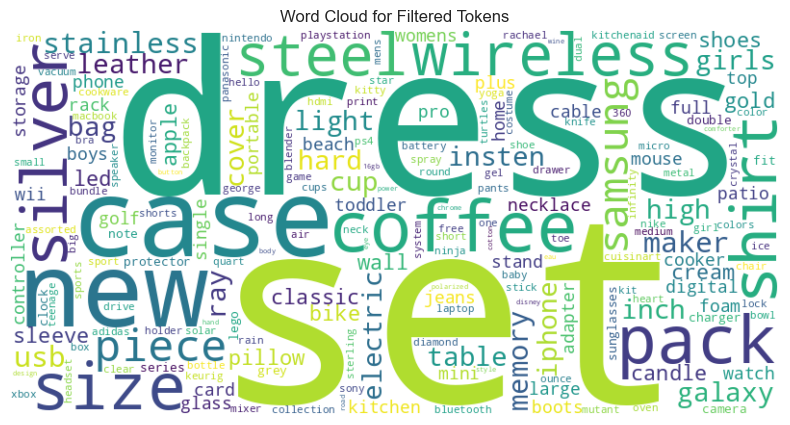

In [176]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud for Filtered Tokens")

plt.savefig('wordcloud_queries.png', bbox_inches='tight')

plt.show()

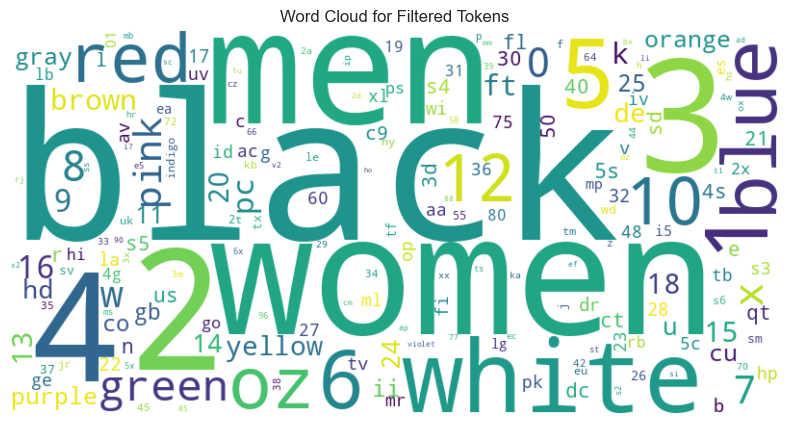

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(removed_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud for Filtered Tokens")
plt.show()

In [72]:
color_counter = Counter()

for tokens in data_EDA_product_title['removed_title_tokens']:
    for token in tokens:
        if token.lower() in colors:
            color_counter[token.lower()] += 1

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_17180\2628027218.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




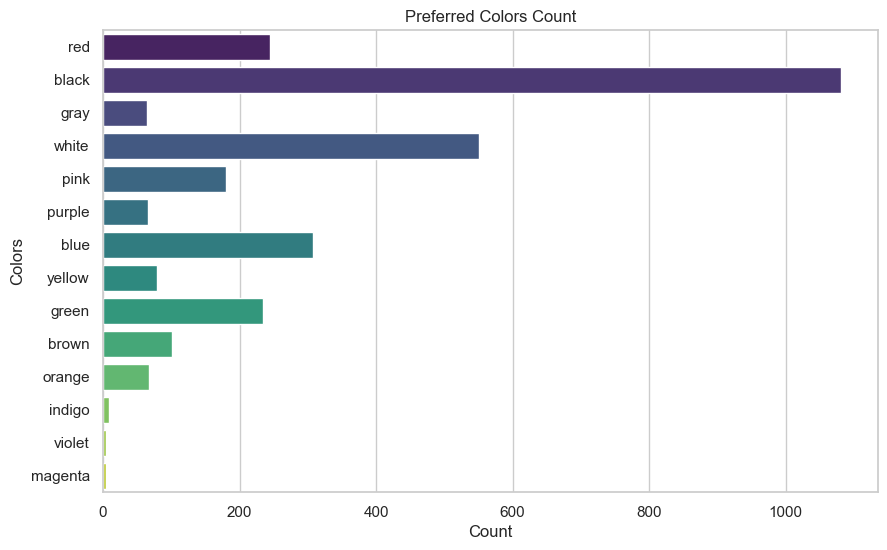

In [177]:
color_counts_df = pd.DataFrame(color_counter.items(), columns=['Color', 'Count'])

# Create a horizontal stacked bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Color', data=color_counts_df, palette='viridis')
plt.title('Preferred Colors Count')
plt.xlabel('Count')
plt.ylabel('Colors')

plt.savefig('most_selected _color_horizontal.png', bbox_inches='tight')

plt.show()


In [74]:
data_EDA_product_title[['title_tokens_filtered','removed_title_tokens']]

title_tokens_filtered removed_title_tokens
0                        [accent, pillow, heart, design]         [red, black]
1      [set, battery, operated, multi, led, train, ch...                 [10]
2       [viewsonic, pro8200, dlp, multimedia, projector]                   []
3      [concept, housewares, 44526, solid, wood, ceil...              [wr, 6]
4      [wintergreen, lighting, christmas, led, light,...                 [25]
...                                                  ...                  ...
10153              [plantronics, tristar, h81n, headset]                   []
10154  [marvel, legends, infinite, series, amazing, s...                  [2]
10155                     [mlb, show, playstation, vita]                 [15]
10156  [junkyard, findings, vintage, trinkets, small,...                  [8]
10157    [polar, coal, heart, rate, monitor, mens, tone]    [f6, black, pink]

[10158 rows x 2 columns]

In [76]:
def generate_ngrams(token_list, n):
    return list(ngrams(token_list, n))

In [77]:
data_EDA_product_title['bigrams'] = data_EDA_product_title['title_tokens_filtered'].apply(lambda x: generate_ngrams(x, 2))
bigram_counts = Counter([bigram for sublist in data_EDA_product_title['bigrams'] for bigram in sublist])


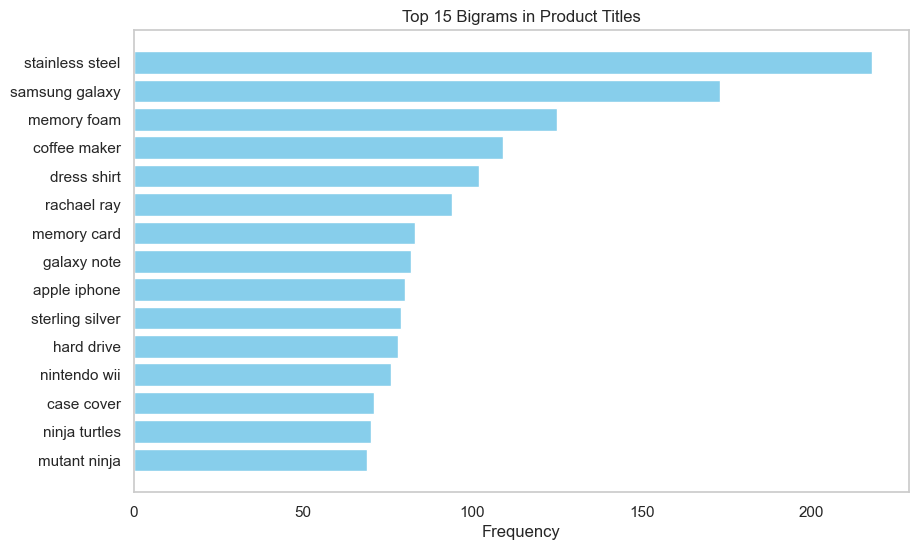

In [183]:
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count'])

bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

bigram_df = bigram_df.sort_values(by='count', ascending=False).head(15)  

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bigram_df['bigram'].astype(str), bigram_df['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 15 Bigrams in Product Titles')
plt.gca().invert_yaxis()  # Invert y axis to show the highest count on top
plt.grid(False)
plt.savefig('bi_gram_title.png', bbox_inches='tight')

plt.show()

In [80]:
data_EDA_product_title['trigrams'] = data_EDA_product_title['title_tokens_filtered'].apply(lambda x: generate_ngrams(x, 3))
trigram_counts = Counter([trigram for sublist in data_EDA_product_title['trigrams'] for trigram in sublist])


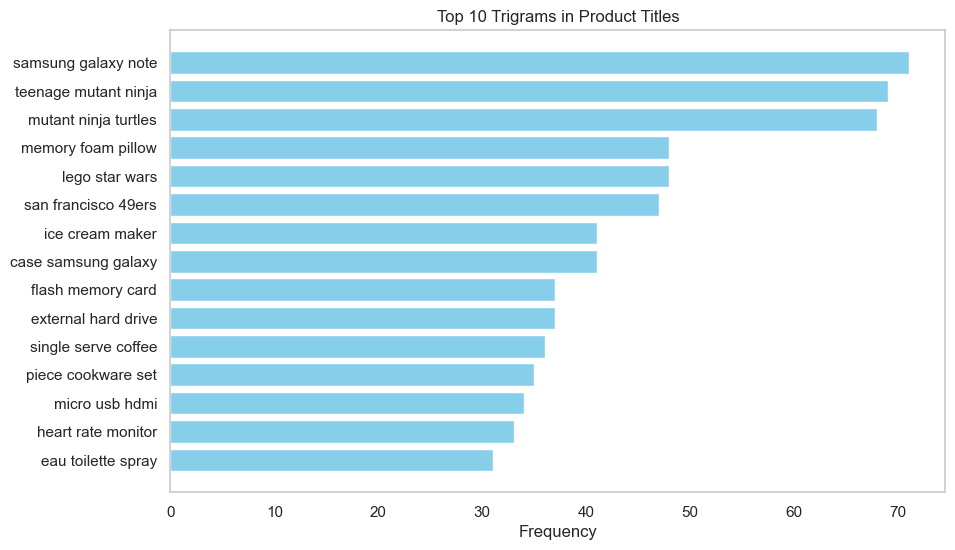

In [184]:
trigram_df = pd.DataFrame(trigram_counts.items(), columns=['trigram', 'count'])

trigram_df['trigram'] = trigram_df['trigram'].apply(lambda x: ' '.join(x))

trigram_df = trigram_df.sort_values(by='count', ascending=False).head(15)  # Top 10 bigrams

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(trigram_df['trigram'].astype(str), trigram_df['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in Product Titles')
plt.gca().invert_yaxis()  # Invert y axis to show the highest count on top
plt.grid(False)

plt.savefig('tri_gram_title.png', bbox_inches='tight')

plt.show()

In [83]:
data_EDA_product_title

product_title  \
0            Accent Pillow with Heart Design - Red/Black   
1      Set of 10 Battery Operated Multi LED Train Chr...   
2             ViewSonic Pro8200 DLP Multimedia Projector   
3      Concept Housewares WR-44526 Solid-Wood Ceiling...   
4      Wintergreen Lighting Christmas LED Light Bulb ...   
...                                                  ...   
10153                 Plantronics TriStar H81N - headset   
10154  Marvel Legends Infinite Series Amazing Spider-...   
10155                MLB 15: The Show (PlayStation Vita)   
10156  Junkyard Findings Vintage Trinkets-Small Typo ...   
10157  Polar F6 Black Coal Heart Rate Monitor Mens Pi...   

                                             title_token  \
0      [Accent, Pillow, with, Heart, Design, -, Red/B...   
1      [Set, of, 10, Battery, Operated, Multi, LED, T...   
2       [ViewSonic, Pro8200, DLP, Multimedia, Projector]   
3      [Concept, Housewares, WR-44526, Solid-Wood, Ce...   
4      [Wintergreen, Lighting, Christmas, LED, Light,...   
...                                                  ...   
10153           [Plantronics, TriStar, H81N, -, headset]   
10154  [Marvel, Legends, Infinite, Series, Amazing, S...   
10155   [MLB, 15, :, The, Show, (, PlayStation, Vita, )]   
10156  [Junkyard, Findings, Vintage, Trinkets-Small, ...   
10157  [Polar, F6, Black, Coal, Heart, Rate, Monitor,...   

                                  processed_title_tokens  \
0      [accent, pillow, with, heart, design, red, black]   
1      [set, of, 10, battery, operated, multi, led, t...   
2       [viewsonic, pro8200, dlp, multimedia, projector]   
3      [concept, housewares, wr, 44526, solid, wood, ...   
4      [wintergreen, lighting, christmas, led, light,...   
...                                                  ...   
10153              [plantronics, tristar, h81n, headset]   
10154  [marvel, legends, infinite, series, amazing, s...   
10155            [mlb, 15, the, show, playstation, vita]   
10156  [junkyard, findings, vintage, trinkets, small,...   
10157  [polar, f6, black, coal, heart, rate, monitor,...   

                               title_tokens_no_stoowords  \
0            [accent, pillow, heart, design, red, black]   
1      [set, 10, battery, operated, multi, led, train...   
2       [viewsonic, pro8200, dlp, multimedia, projector]   
3      [concept, housewares, wr, 44526, solid, wood, ...   
4      [wintergreen, lighting, christmas, led, light,...   
...                                                  ...   
10153              [plantronics, tristar, h81n, headset]   
10154  [marvel, legends, infinite, series, amazing, s...   
10155                 [mlb, 15, show, playstation, vita]   
10156  [junkyard, findings, vintage, trinkets, small,...   
10157  [polar, f6, black, coal, heart, rate, monitor,...   

                                   title_tokens_filtered removed_title_tokens  \
0                        [accent, pillow, heart, design]         [red, black]   
1      [set, battery, operated, multi, led, train, ch...                 [10]   
2       [viewsonic, pro8200, dlp, multimedia, projector]                   []   
3      [concept, housewares, 44526, solid, wood, ceil...              [wr, 6]   
4      [wintergreen, lighting, christmas, led, light,...                 [25]   
...                                                  ...                  ...   
10153              [plantronics, tristar, h81n, headset]                   []   
10154  [marvel, legends, infinite, series, amazing, s...                  [2]   
10155                     [mlb, show, playstation, vita]                 [15]   
10156  [junkyard, findings, vintage, trinkets, small,...                  [8]   
10157    [polar, coal, heart, rate, monitor, mens, tone]    [f6, black, pink]   

                                                 bigrams  \
0      [(accent, pillow), (pillow, heart), (heart, de...   
1      [(set, battery), (battery, operated), (operate...   
2     

In [84]:
spell = SpellChecker()

def correct_spelling(token_list):
    corrected = []
    for token in token_list:
        if token:  # Check if token is not empty
            candidates = spell.candidates(token)
            corrected.append(candidates.pop() if candidates else token)  # Use the candidate if available
        else:
            corrected.append(token)  # Append the original token if it's empty
    return corrected

In [85]:
tqdm.pandas(desc="Spell Checking")

In [86]:
data_EDA_product_title['corrected_tokens'] = data_EDA_product_title['title_tokens_no_stoowords'].progress_apply(correct_spelling)

Spell Checking: 100%|████████████████████████████████████████████████████████████| 10158/10158 [34:05<00:00,  4.97it/s]


### Product Description

In [87]:
data_EDA_description = pd.DataFrame()

In [88]:
data_EDA_description = data[['product_description']]

In [89]:
data_EDA_description['desc_token'] = data['product_description'].apply(word_tokenize)

In [90]:
data_EDA_description['processed_desc_token'] = data_EDA_description['desc_token'].apply(process_words)
data_EDA_description['processed_desc_token'] = data_EDA_description['processed_desc_token'].apply(process_tokens)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [91]:
data_EDA_description['processed_desc_token'][7410]

['enjoy',
 'even',
 'healthy',
 'cooking',
 'versatility',
 '84',
 'sq',
 ' ',
 ' ',
 'removable',
 'plate',
 'grill',
 ' ',
 'featuring',
 '4',
 'plates',
 'grilling',
 ' ',
 'baking',
 'muffing',
 'making',
 ' ',
 'adjustable',
 'slope',
 'george',
 'tough ',
 'nonstick',
 'coating',
 ' ',
 'get',
 'precise',
 'cooking',
 'control',
 'digital',
 'time',
 'temperature',
 ' ',
 'plus',
 'easy',
 'cleaning',
 'dishwasher safe',
 'accessories',
 ' ']

In [92]:
def clean_and_split_tokens(tokens):
    new_tokens = []
    for token in tokens:
        token = token.strip()  # Remove leading/trailing spaces
        if token:  # Check if token is not empty
            # Split multi-word tokens
            split_tokens = token.split()
            for t in split_tokens:
                # Filter out single numbers and single letters
                if len(t) > 1 or (t.isdigit() and len(t) > 1):  # Keep only multi-char tokens
                    new_tokens.append(t)
    return new_tokens

In [93]:
data_EDA_description['processed_desc_token'] = data_EDA_description['processed_desc_token'].apply(clean_and_split_tokens)


In [94]:
data_EDA_description['processed_desc_token'][7410]

['enjoy',
 'even',
 'healthy',
 'cooking',
 'versatility',
 '84',
 'sq',
 'removable',
 'plate',
 'grill',
 'featuring',
 'plates',
 'grilling',
 'baking',
 'muffing',
 'making',
 'adjustable',
 'slope',
 'george',
 'tough',
 'nonstick',
 'coating',
 'get',
 'precise',
 'cooking',
 'control',
 'digital',
 'time',
 'temperature',
 'plus',
 'easy',
 'cleaning',
 'dishwasher',
 'safe',
 'accessories']

In [95]:
all_tokens = data_EDA_description['processed_desc_token'].explode().dropna().tolist()
all_text = ' '.join(all_tokens)

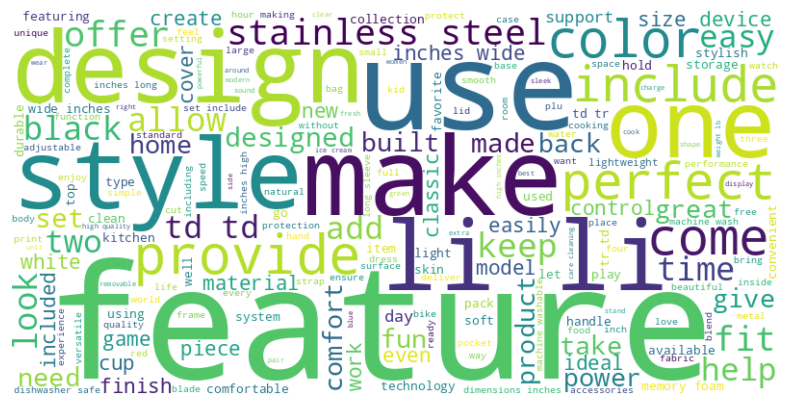

In [96]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

html terms 
* li
* td 
* tr

In [97]:
html_terms = ['li', 'td', 'tr','br','inches','wide']

# Function to clean tokens
def clean_tokens(tokens):
    return [
        token for token in tokens
        if token.strip() and token.lower() not in html_terms
    ]

In [98]:
data_EDA_description['processed_desc_token'] = data_EDA_description['processed_desc_token'].apply(clean_tokens)

In [99]:
all_tokens = data_EDA_description['processed_desc_token'].explode().dropna().tolist()
all_text = ' '.join(all_tokens)

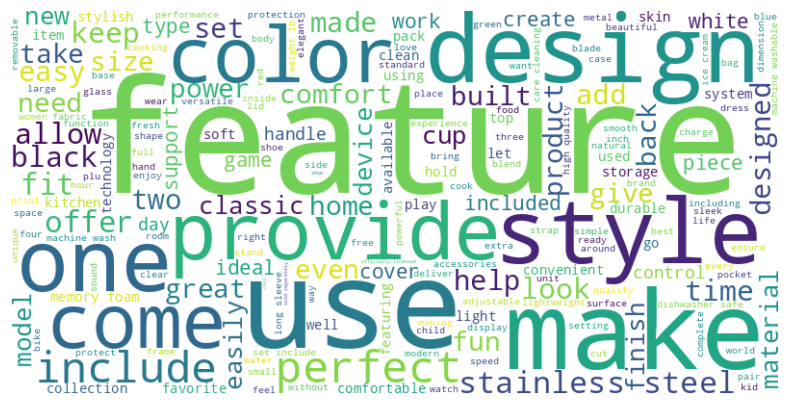

In [100]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [101]:
data_EDA_description['bigrams'] = data_EDA_description['processed_desc_token'].apply(lambda tokens: generate_ngrams(tokens, 2))
data_EDA_description['trigrams'] = data_EDA_description['processed_desc_token'].apply(lambda tokens: generate_ngrams(tokens, 3))

In [102]:
bigrams_flat = [bigram for sublist in data_EDA_description['bigrams'] for bigram in sublist]
trigrams_flat = [trigram for sublist in data_EDA_description['trigrams'] for trigram in sublist]

In [103]:
bigram_freq = Counter(bigrams_flat)
trigram_freq = Counter(trigrams_flat)


In [104]:
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(10)
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

In [105]:
trigram_df = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(10)
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))

In [106]:
plt.figure(figsize=(12, 10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_17180\2623542596.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Bigrams')

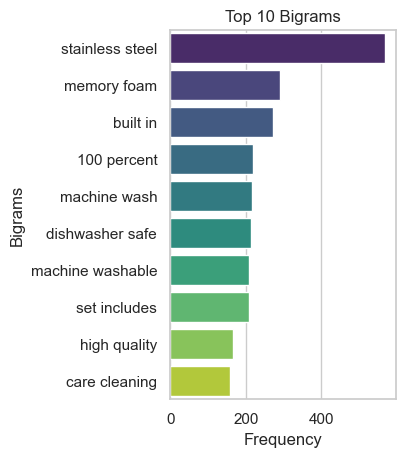

In [107]:
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
plt.title('Top 10 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_17180\2042684384.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




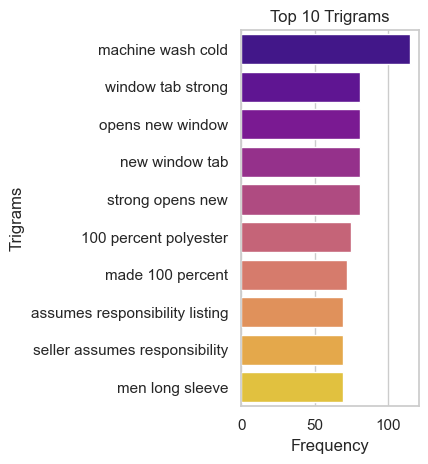

In [108]:
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='plasma')
plt.title('Top 10 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')

plt.tight_layout()
plt.show()

In [109]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def process_tokens(tokens):
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    
    return lemmatized_tokens

In [110]:
data_EDA_description['processed_desc_token'] = data_EDA_description['processed_desc_token'].apply(process_tokens)

In [111]:
data_EDA_product_title['corrected_tokens'] = data_EDA_product_title['corrected_tokens'].apply(process_tokens)

In [112]:
df = pd.DataFrame()

In [113]:
df['relevance_variance'] = data['relevance_variance']

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()

In [116]:
df['scalar_relevacne_relevance'] = scaler.fit_transform(df[['relevance_variance']])

In [117]:
df

relevance_variance  scalar_relevacne_relevance
0                   0.000                    0.000000
1                   0.000                    0.000000
2                   0.471                    0.320408
3                   0.000                    0.000000
4                   0.471                    0.320408
...                   ...                         ...
10153               0.471                    0.320408
10154               0.471                    0.320408
10155               1.247                    0.848299
10156               0.471                    0.320408
10157               0.000                    0.000000

[10158 rows x 2 columns]

In [195]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [118]:
Final_df = pd.DataFrame()

In [119]:
Final_df['query'] = data_EDA_Query[['query_token']]

In [120]:
Final_df['title'] = data_EDA_product_title['corrected_tokens']

In [121]:
Final_df['description'] = data_EDA_description['processed_desc_token']

In [122]:
Final_df['combined_tokens'] = Final_df['query'] + Final_df['title'] + Final_df['description']

In [123]:
!pip install gensim

In [124]:
Final_df

query  \
0       [bridal, shower, decorations]   
1            [led, christmas, lights]   
2                         [projector]   
3                        [wine, rack]   
4                       [light, bulb]   
...                               ...   
10153  [plantronics, corded, headset]   
10154                     [spiderman]   
10155     [playstation, vita, system]   
10156                 [flower, bulbs]   
10157   [polar, heart, rate, monitor]   

                                                   title  \
0            [accent, pillow, heart, design, red, black]   
1      [set, 10, batteri, oper, mufti, led, train, ch...   
2         [viewson, pro8200, dip, multimedia, projector]   
3      [concept, housewar, wri, 44526, solid, wood, c...   
4      [wintergreen, light, chrismal, led, light, bul...   
...                                                  ...   
10153                   [plantron, arista, hon, headset]   
10154  [marvel, legend, infinit, seri, amaz, spider, ...   
10155                     [mob, 15, show, plantat, vita]   
10156  [junkyard, find, vintag, trinket, small, typo,...   
10157  [polar, f, black, coal, heart, rate, monitor, ...   

                                             description  \
0      [red, satin, accent, pillow, embroid, heart, b...   
1      [set, 10, batteri, oper, train, christma, ligh...   
2                                                     []   
3      [like, silent, sturdi, tree, southern, enterpr...   
4      [wtgr1011, featur, nickel, base, 60, 000, aver...   
...                                                  ...   
10153  [four, size, user, select, earbud, adjust, rec...   
10154                                                 []   
10155  [essenti, part, everi, fan, season, show, 10th...   
10156  [prima, flower, junkyard, find, vintag, trinke...   
10157                                                 []   

                                         combined_tokens  
0      [bridal, shower, decorations, accent, pillow, ...  
1      [led, christmas, lights, set, 10, batteri, ope...  
2      [projector, viewson, pro8200, dip, multimedia,...  
3      [wine, rack, concept, housewar, wri, 44526, so...  
4      [light, bulb, wintergreen, light, chrismal, le...  
...                                                  ...  
10153  [plantronics, corded, headset, plantron, arist...  
10154  [spiderman, marvel, legend, infinit, seri, ama...  
10155  [playstation, vita, system, mob, 15, show, pla...  
10156  [flower, bulbs, junkyard, find, vintag, trinke...  
10157  [polar, heart, rate, monitor, polar, f, black,...  

[10158 rows x 4 columns]

In [125]:
data['median_relevance']

0        1
1        4
2        4
3        4
4        2
        ..
10153    4
10154    2
10155    2
10156    1
10157    4
Name: median_relevance, Length: 10158, dtype: int64

In [126]:
from transformers import BertTokenizer, BertModel
import torch

In [127]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [128]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [129]:
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Average pooling


In [130]:
tqdm.pandas()  # Enable tqdm for pandas apply

# Apply BERT embeddings with a progress bar
Final_df['bert_vectors'] = Final_df['combined_tokens'].progress_apply(lambda x: get_bert_embeddings(' '.join(x)))

# Convert the list of embeddings to a numpy array
X_vectors = np.array(Final_df['bert_vectors'].tolist())



100%|████████████████████████████████████████████████████████████████████████████| 10158/10158 [25:09<00:00,  6.73it/s]


In [131]:
# Combine BERT embeddings and relevance variance
X = np.hstack((X_vectors, data['relevance_variance'].values.reshape(-1, 1)))

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
y = data['median_relevance']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [192]:
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

Logistic Regression - Accuracy: 0.6068, F1 Score: 0.5603


M:\Projects\crowdflower\crowdflower\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

M:\Projects\crowdflower\crowdflower\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

M:\Projects\crowdflower\crowdflower\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Support Vector Machine - Accuracy: 0.6014, F1 Score: 0.4559
K-Nearest Neighbors - Accuracy: 0.5950, F1 Score: 0.5634
Random Forest - Accuracy: 0.6009, F1 Score: 0.4760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195875
[LightGBM] [Info] Number of data points in the train set: 8126, number of used features: 769
[LightGBM] [Info] Start training from score -2.591006
[LightGBM] [Info] Start training from score -1.918598
[LightGBM] [Info] Start training from score -1.774436
[LightGBM] [Info] Start training from score -0.496490
LightGBM - Accuracy: 0.6585, F1 Score: 0.5985


M:\Projects\crowdflower\crowdflower\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:28:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost - Accuracy: 0.6422, F1 Score: 0.5858


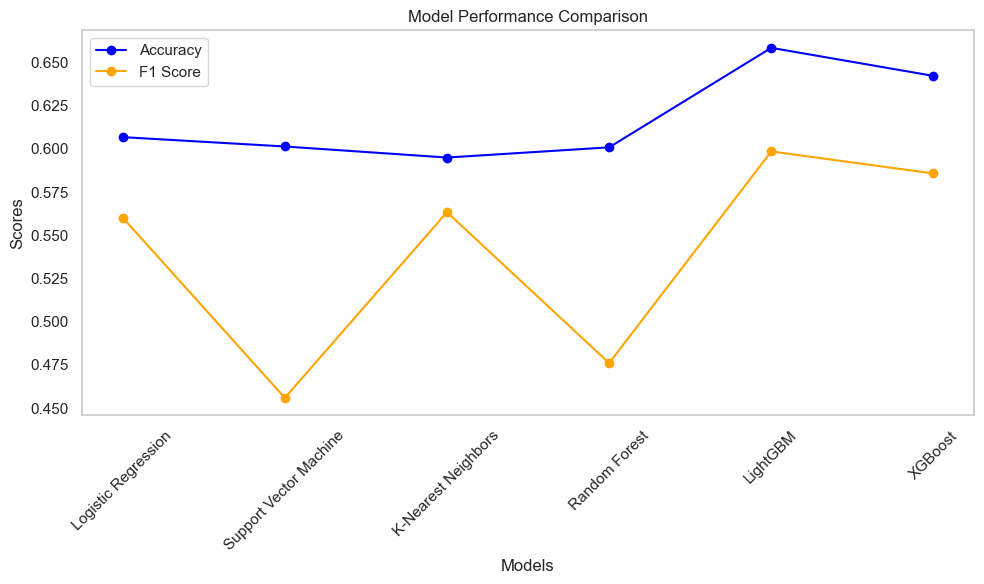

In [193]:
results_df = pd.DataFrame(results).T

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Accuracy'], marker='o', label='Accuracy', color='blue')
plt.plot(results_df.index, results_df['F1 Score'], marker='o', label='F1 Score', color='orange')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Save the plot
plt.savefig('model_performance_comparison.png')

# Show plot
plt.show()

In [198]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define a smaller parameter grid
param_grid_xgb = {
    'max_depth': [4, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='accuracy', cv=5, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


M:\Projects\crowdflower\crowdflower\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:38:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


M:\Projects\crowdflower\crowdflower\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:38:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


M:\Projects\crowdflower\crowdflower\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:38:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


M:\Projects\crowdflower\crowdflower\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:39:09] WARNING: 

XGBoost Accuracy: 0.6584645669291339
              precision    recall  f1-score   support

           0       0.67      0.08      0.15       165
           1       0.41      0.20      0.27       283
           2       0.50      0.34      0.41       359
           3       0.70      0.94      0.80      1225

    accuracy                           0.66      2032
   macro avg       0.57      0.39      0.41      2032
weighted avg       0.62      0.66      0.60      2032

